# Magic the Gathering Cards: Gather and Tidy Data
This script gathers art imges and card data from the webservice, scryfall.

## Setup
 Import Required Libraries

In [100]:
import json
import pandas as pd
import urllib.request
from time import sleep

## Process the scryfall artwork card database

### Convert the JSON file into a pandas dataframe

In [120]:
pd_data = {}

In [121]:
#scryfall-artwork-cards.json
pd_data = {} #{'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']
with open('scryfall-artwork-cards.json') as json_file:
    data = json.load(json_file)
    for c in data:
      if 'image_uris' in c and 'art_crop' in c['image_uris'] and 'name' in c and 'lang' in c:
        pd_data[c['id']] = [c['name'], c['lang'], c['image_uris']['art_crop'] ,c.get('mana_cost',''),c.get('cmc',''), c.get('colors',''), c.get('type_line',''),c.get('rarity',''),c.get('oracle_text'), c.get('flavor_text','')]
      #else:
        #print(f"Skipped {c['id']} due to missing key")
  


df = pd.DataFrame.from_dict(pd_data, orient='index', columns=['name', 'language', 'art_crop', 'mana_cost','cmc', 'colors','type_line','rarity','oracle_text','flavor_text'])

       

In [122]:
df.shape

(25095, 10)

In [123]:
df.sample(5)        

,name,language,art_crop,mana_cost,cmc,colors,type_line,rarity,oracle_text,flavor_text
c7eb0144-34f8-43e1-95fe-f2ca62d88e5d,"Karador, Ghost Chieftain",en,https://img.scryfall.com/cards/art_crop/front/...,{5}{W}{B}{G},8.0,"[B, G, W]",Legendary Creature — Centaur Spirit,mythic,This spell costs {1} less to cast for each cre...,"""Death tried to uncrown me. But now I return, ..."
8e3eead8-7e07-4463-9e67-c396d2d7931e,Hulking Goblin,en,https://img.scryfall.com/cards/art_crop/front/...,{1}{R},2.0,[R],Creature — Goblin,common,Hulking Goblin can't block.,"The bigger they are, the harder they avoid work."
e4c79155-b6d8-46df-891f-487b24c4e0d5,Blinkmoth Well,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,[],Land,uncommon,"{T}: Add {C}.\n{2}, {T}: Tap target noncreatur...","When dictated by blinkmoth migratory patterns,..."
d998db65-8785-4ee9-940e-fa9ab62e180f,Farm // Market,en,https://img.scryfall.com/cards/art_crop/front/...,{2}{W} // {2}{U},6.0,"[U, W]",Instant // Sorcery,uncommon,None,
aa432e4e-ff23-4ad2-8d0a-403efee86f11,Graveborn Muse,en,https://img.scryfall.com/cards/art_crop/front/...,{2}{B}{B},4.0,[B],Creature — Zombie Spirit,rare,"At the beginning of your upkeep, you draw X ca...","""Her voice is damnation, unyielding and certai..."


### Cleanup the dataframe

#### Remove non-english cards

In [124]:
df.language.value_counts()

en    25025
ja       58
pt        4
de        2
he        1
ar        1
sa        1
es        1
it        1
ru        1
Name: language, dtype: int64

In [125]:
df = df[df.language == 'en']

In [126]:
df.language.value_counts()

en    25025
Name: language, dtype: int64

#### Unpack the colors

In [127]:
def unlist_to_string(el):
  s = ""
  for e in el:
    s = s + e
  return s

In [128]:
df.colors = df.colors.apply(lambda x: unlist_to_string(x))

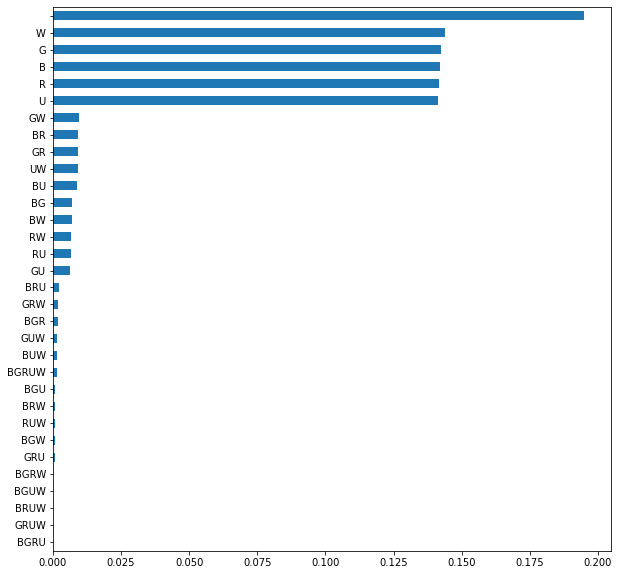

In [129]:
df.colors.value_counts(normalize=True,ascending=True).plot(kind='barh',figsize=(10,10))

#### Remove all "token" cards
Magic contains a number of "token" cards.  These cards are not required for the game of magic and players often use bottlecaps, dice, and other non-game objects as tokens.


In [130]:
# Find any token cards
bTokens = df.type_line.str.lower().str.contains('token')
df = df[~bTokens]

In [131]:
df.shape

(24478, 10)

#### Cleanup Lands

In [132]:
df.type_line = df.type_line.str.lower()
df[df.type_line.str.contains('land')]

,name,language,art_crop,mana_cost,cmc,colors,type_line,rarity,oracle_text,flavor_text
4c19926a-7792-4e0f-8418-a44f0cf5eeea,City of Traitors,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,land,mythic,"When you play another land, sacrifice City of ...",
ec1f1041-f667-4b73-b1f2-e5bcae84095e,Command Tower,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,land,common,{T}: Add one mana of any color in your command...,"""Approach my tower on bended knee or depart fr..."
f5159db6-a87f-40eb-8c5c-821dfb67ff6d,Thornwood Falls,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,land,common,Thornwood Falls enters the battlefield tapped....,
75f5875e-487f-4586-95f3-3627050a6744,Wind-Scarred Crag,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,land,common,Wind-Scarred Crag enters the battlefield tappe...,
4fd257a5-439d-4ef8-9cc9-9741e99a04e3,Forest,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — forest,common,({T}: Add {G}.),
e52fa771-eaff-48e0-8c23-d118dc4b3438,Forest,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — forest,common,({T}: Add {G}.),
daff5153-cdb8-4ed2-b17e-7ee2aa689da0,Forest,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — forest,common,({T}: Add {G}.),
f8f03bb2-313e-4688-945f-052eed678174,Forest,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — forest,common,({T}: Add {G}.),
f3f43c81-10fc-4e08-9070-5453bc5826b4,Mountain,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — mountain,common,({T}: Add {R}.),
e84db98e-c51a-4380-8704-57fdd5eb360f,Mountain,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,basic land — mountain,common,({T}: Add {R}.),


### Download Card Artwork

In [17]:
for index, row in df.iterrows():
    urllib.request.urlretrieve(row['art_crop'], f"images/{index}.jpg")
    sleep(0.05) # sleep 50 ms between requests to conform with scryfall rate limits

### Crop cards to the same size

In [39]:
from PIL import Image
import os.path

widths = []
heights = []
for index, row in df.iterrows():
    filename = os.path.join("images", f"{index}.jpg")
    img = Image.open(filename)
    widths.append(img.size[0])
    heights.append(img.size[1])
    #if(img.size[0] < min_w):
    #    min_w = img.size[0]
    #if(img.size[1] < min_h):
    #    min_h = img.size[1]

#print(min_w, min_h)

df['width'] = widths
df['height'] = heights

In [68]:
import numpy as np
pd.pivot_table(df, values='rarity', index=['width', 'height'],columns=['language'], aggfunc='count')


,language,en
width,height,
312,752,14
473,549,5
511,452,1
514,562,1
540,448,76
563,451,294
566,704,16
570,402,54
571,460,5734


In [71]:
for index, row in df.iterrows():
    filename = os.path.join("images", f"{index}.jpg")
    img = Image.open(filename)
    img = img.resize((616,452)) # resize to our most common image size
    img.save(f"cropped/{index}.jpg")

In [98]:
df.to_csv("cards.csv")

In [133]:
df['type'] = df.type_line.str.split(' — ', expand=True)[0]

In [134]:
df['subtype'] = df.type_line.str.split(' — ', expand=True)[1]


In [137]:
df_copy = df.copy(deep=True)

In [141]:
valid_types=['creature','instant','sorcery','enchantment','artifact','basic land','legendary creature','land','artifact creature','legendary planeswalker']
df_copy = df_copy[df_copy.type.isin(valid_types)]
df_copy.sample(5)

,name,language,art_crop,mana_cost,cmc,colors,type_line,rarity,oracle_text,flavor_text,type,subtype
c0165eb2-e268-4587-9e46-1bf59285b48c,Silkwrap,en,https://img.scryfall.com/cards/art_crop/front/...,{1}{W},2.0,W,enchantment,uncommon,"When Silkwrap enters the battlefield, exile ta...",Better scarves than scars.,enchantment,None
bd1206d4-ce7d-4504-addc-8182a586087e,Rafiq of the Many,en,https://img.scryfall.com/cards/art_crop/front/...,{1}{G}{W}{U},4.0,GUW,legendary creature — human knight,mythic,Exalted (Whenever a creature you control attac...,"Many sigils, one purpose.",legendary creature,human knight
8d73d1e7-79be-4b28-a480-b65b4f34f755,Amugaba,en,https://img.scryfall.com/cards/art_crop/front/...,{5}{U}{U},7.0,U,creature — illusion,rare,"Flying\n{2}{U}, Discard a card: Return Amugaba...",The aven claim it feeds on thunder and rainbows.,creature,illusion
f9ea2808-0dde-4065-ae7d-905aae98703f,Zephyr Charge,en,https://img.scryfall.com/cards/art_crop/front/...,{1}{U},2.0,U,enchantment,common,{1}{U}: Target creature gains flying until end...,"""All armies prefer high ground to low and sunn...",enchantment,None
9ba12fb1-de8c-46c6-b33f-e0580ed2a3ee,Mournful Zombie,en,https://img.scryfall.com/cards/art_crop/front/...,{2}{B},3.0,B,creature — zombie,common,"{W}, {T}: Target player gains 1 life.",Treated with a powerful mix of herbs and potio...,creature,zombie


In [157]:
df_copy.sample(30)

,name,language,art_crop,mana_cost,cmc,colors,type_line,rarity,oracle_text,flavor_text,type,subtype
29a6db88-a11d-49b4-8692-28b24d23f3c7,Umbilicus,en,https://img.scryfall.com/cards/art_crop/front/...,{4},4.0,,artifact,rare,"At the beginning of each player's upkeep, that...",It was the explorers' only tether to reality.,artifact,None
cd9dd7c6-36b6-4fe2-b3d3-f62a6e10a428,Sunder,en,https://img.scryfall.com/cards/art_crop/front/...,{3}{U}{U},5.0,U,instant,rare,Return all lands to their owners' hands.,The flow of time was disrupted; like a floodin...,instant,None
44c4476d-58f9-420d-9545-f5d580c589de,Phyrexian Obliterator,en,https://img.scryfall.com/cards/art_crop/front/...,{B}{B}{B}{B},4.0,B,creature — horror,mythic,Trample\nWhenever a source deals damage to Phy...,"""Behold blessed perfection."" —Sheoldred, Whisp...",creature,horror
3003bf1e-8085-45d8-882b-c449109e7631,Singing Tree,en,https://img.scryfall.com/cards/art_crop/front/...,{3}{G},4.0,G,creature — plant,rare,{T}: Target attacking creature has base power ...,,creature,plant
d84c9b19-9b4d-4a60-984f-636b749c8bcc,Wolfhunter's Quiver,en,https://img.scryfall.com/cards/art_crop/front/...,{1},1.0,,artifact — equipment,uncommon,"Equipped creature has ""{T}: This creature deal...","""Steel in the heart, silver in the bow."" —Wolf...",artifact,equipment
17e50157-bf49-4c5f-9b8a-bf73484e63a5,Paradoxical Outcome,en,https://img.scryfall.com/cards/art_crop/front/...,{3}{U},4.0,U,instant,rare,"Return any number of target nonland, nontoken ...",The results of Rashmi's experimentation forced...,instant,None
71a5d8de-25f1-4070-a7a6-dc3f2339ce30,Abbey Gargoyles,en,https://img.scryfall.com/cards/art_crop/front/...,{2}{W}{W}{W},5.0,W,creature — gargoyle,uncommon,"Flying, protection from red","""Though Serra has not been seen for twenty yea...",creature,gargoyle
8cc0c40f-1d6c-4940-9c0a-566458a8ab04,Mask of Riddles,en,https://img.scryfall.com/cards/art_crop/front/...,{U}{B},2.0,BU,artifact — equipment,uncommon,Equipped creature has fear. (It can't be block...,,artifact,equipment
b11f5296-5f7d-41ca-a67d-e976273d7386,Gingerbread Cabin,en,https://img.scryfall.com/cards/art_crop/front/...,,0.0,,land — forest,common,({T}: Add {G}.)\nGingerbread Cabin enters the ...,,land,forest
de6ff6af-22f4-46fb-97d3-6f8f20f8b16c,Coercion,en,https://img.scryfall.com/cards/art_crop/front/...,{2}{B},3.0,B,sorcery,uncommon,Target opponent reveals their hand. You choose...,"""Human tenderness is simply weakness in a pret...",sorcery,None


In [118]:
df.subtype

4a8a98f2-c777-4dc0-ab68-2b1df7ce1ddd    None
Name: subtype, dtype: object

In [119]:
df.sample(3)

ValueError: Cannot take a larger sample than population when 'replace=False'